In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifake-test/1018 (8).jpg
/kaggle/input/cifake-test/1017 (6).jpg
/kaggle/input/cifake-test/1018 (4).jpg
/kaggle/input/cifake-test/1017 (7).jpg
/kaggle/input/cifake-test/1018.jpg
/kaggle/input/cifake-test/1019 (2).jpg
/kaggle/input/cifake-test/1018 (10).jpg
/kaggle/input/cifake-test/1019 (4).jpg
/kaggle/input/cifake-test/1017 (9).jpg
/kaggle/input/cifake-test/1017 (4).jpg
/kaggle/input/cifake-test/1018 (9).jpg
/kaggle/input/cifake-test/1018 (2).jpg
/kaggle/input/cifake-test/1019 (5).jpg


In [2]:
%cd /kaggle/working/
!git clone -b v1.0 https://github.com/camenduru/LLaVA
%cd /kaggle/working/LLaVA

!pip install -q transformers==4.36.2
!pip install -q gradio .

from transformers import AutoTokenizer, BitsAndBytesConfig
from llava.model import LlavaLlamaForCausalLM
import torch

model_path = "4bit/llava-v1.5-13b-3GB"
    
kwargs = {"device_map": "auto"}
kwargs['load_in_4bit'] = True
kwargs['quantization_config'] = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type='nf4'
)
model = LlavaLlamaForCausalLM.from_pretrained(model_path, low_cpu_mem_usage=True, **kwargs)
tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=False)

vision_tower = model.get_vision_tower()
if not vision_tower.is_loaded:
    vision_tower.load_model()
vision_tower.to(device='cuda')
image_processor = vision_tower.image_processor

import os
import requests
from PIL import Image
from io import BytesIO
from llava.conversation import conv_templates, SeparatorStyle
from llava.utils import disable_torch_init
from llava.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN, DEFAULT_IM_START_TOKEN, DEFAULT_IM_END_TOKEN
from llava.mm_utils import tokenizer_image_token, get_model_name_from_path, KeywordsStoppingCriteria
from transformers import TextStreamer



/kaggle/working
Cloning into 'LLaVA'...
remote: Enumerating objects: 1960, done.
remote: Total 1960 (delta 0), reused 0 (delta 0), pack-reused 1960 (from 1)
Receiving objects: 100% (1960/1960), 13.60 MiB | 26.79 MiB/s, done.
Resolving deltas: 100% (1173/1173), done.
/kaggle/working/LLaVA
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.17 requires pydantic>=2.7.0, but you have pydantic 1.10.19 which is incompatible.
jupyterlab 4.2.5 requires httpx>=0.25.0, but you have httpx 0.24.0 which is incompatible.
jupyterlab 4.2.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
kaggle-environments 1.14.15 requires transformers>=4.33.1, but you have transformers 4.31.0 which is incompatible.
pytorch-lightning 2.4.0 re

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/33.7k [00:00<?, ?B/s]

pytorch_model-00001-of-00009.bin:   0%|          | 0.00/2.97G [00:00<?, ?B/s]

pytorch_model-00002-of-00009.bin:   0%|          | 0.00/2.93G [00:00<?, ?B/s]

pytorch_model-00003-of-00009.bin:   0%|          | 0.00/2.89G [00:00<?, ?B/s]

pytorch_model-00004-of-00009.bin:   0%|          | 0.00/2.96G [00:00<?, ?B/s]

pytorch_model-00005-of-00009.bin:   0%|          | 0.00/2.89G [00:00<?, ?B/s]

pytorch_model-00006-of-00009.bin:   0%|          | 0.00/2.98G [00:00<?, ?B/s]

pytorch_model-00007-of-00009.bin:   0%|          | 0.00/2.87G [00:00<?, ?B/s]

pytorch_model-00008-of-00009.bin:   0%|          | 0.00/2.89G [00:00<?, ?B/s]

pytorch_model-00009-of-00009.bin:   0%|          | 0.00/2.72G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.76k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/9 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [5]:
def caption_image(image_file, prompt):
    if image_file.startswith('http') or image_file.startswith('https'):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        image = Image.open(image_file).convert('RGB')
    disable_torch_init()
    conv_mode = "llava_v0"
    conv = conv_templates[conv_mode].copy()
    roles = conv.roles
    image_tensor = image_processor.preprocess(image, return_tensors='pt')['pixel_values'].half().cuda()
    inp = f"{roles[0]}: {prompt}"
    inp = DEFAULT_IM_START_TOKEN + DEFAULT_IMAGE_TOKEN + DEFAULT_IM_END_TOKEN + '\n' + inp
    conv.append_message(conv.roles[0], inp)
    conv.append_message(conv.roles[1], None)
    raw_prompt = conv.get_prompt()
    input_ids = tokenizer_image_token(raw_prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt').unsqueeze(0).cuda()
    stop_str = conv.sep if conv.sep_style != SeparatorStyle.TWO else conv.sep2
    keywords = [stop_str]
    stopping_criteria = KeywordsStoppingCriteria(keywords, tokenizer, input_ids)
    with torch.inference_mode():
      output_ids = model.generate(input_ids, images=image_tensor, do_sample=True, temperature=0.2,
                                  max_new_tokens=4096, use_cache=True, stopping_criteria=[stopping_criteria])
    outputs = tokenizer.decode(output_ids[0, input_ids.shape[1]:]).strip()
    conv.messages[-1][-1] = outputs
    output = outputs.rsplit('</s>', 1)[0]
    return image, output

In [12]:
prompt = '''
This is an AI generated image. Give a description of why the image is AI generated. Provide all the reasons which you can find that it might be AI generated+
# List of Artifacts

- Inconsistent object boundaries
- Discontinuous surfaces
- Non-manifold geometries in rigid structures
- Floating or disconnected components
- Asymmetric features in naturally symmetric objects 
- Misaligned bilateral elements in animal faces 
- Irregular proportions in mechanical components 
- Texture bleeding between adjacent regions
- Texture repetition patterns
- Over-smoothing of natural textures 
- Artificial noise patterns in uniform surfaces
- Unrealistic specular highlights
- Inconsistent material properties
- Metallic surface artifacts 
- Dental anomalies in mammals 
- Anatomically incorrect paw structures
- Improper fur direction flows
- Unrealistic eye reflections
- Misshapen ears or appendages
- Impossible mechanical connections
- Inconsistent scale of mechanical parts
- Physically impossible structural elements
- Inconsistent shadow directions
- Multiple light source conflicts
- Missing ambient occlusion
- Incorrect reflection mapping
- Incorrect perspective rendering
- Scale inconsistencies within single objects
- Spatial relationship errors
- Depth perception anomalies
- Over-sharpening artifacts
- Aliasing along high-contrast edges
- Blurred boundaries in fine details
- Jagged edges in curved structures
- Random noise patterns in detailed areas
- Loss of fine detail in complex structures
- Artificial enhancement artifacts
- Incorrect wheel geometry
- Implausible aerodynamic structures
- Misaligned body panels
- Impossible mechanical joints
- Distorted window reflections
- Anatomically impossible joint configurations
- Unnatural pose artifacts
- Biological asymmetry errors
- Regular grid-like artifacts in textures
- Repeated element patterns
- Systematic color distribution anomalies
- Frequency domain signatures
- Color coherence breaks
- Unnatural color transitions
- Resolution inconsistencies within regions
- Unnatural Lighting Gradients
- Incorrect Skin Tones
- Fake depth of field
- Abruptly cut off objects
- Glow or light bleed around object boundaries
- Ghosting effects: Semi-transparent duplicates of elements
- Cinematization Effects
- Excessive sharpness in certain image regions
- Artificial smoothness
- Movie-poster like composition of ordinary scenes
- Dramatic lighting that defies natural physics
- Artificial depth of field in object presentation
- Unnaturally glossy surfaces
- Synthetic material appearance
- Multiple inconsistent shadow sources
- Exaggerated characteristic features
- Impossible foreshortening in animal bodies
- Scale inconsistencies within the same object class



here are the things you will tell me if the image is AI generated, which of these are present in the image, and provide description of each artifact you find
'''

The image is an AI generated image, likely created using a generative model like GANs or VAEs. The presence of several artifacts suggests that the image is not a real photograph.

1. Inconsistent object boundaries: The horse's body parts, such as the head and legs, appear to be disconnected or misaligned, creating an unnatural appearance.
2. Discontinuous surfaces: The horse's fur and skin may have a disconnected or uneven texture, which is not consistent with the natural appearance of a horse.
3. Non-manifold geometries in rigid structures: The horse's body may have irregular shapes or proportions, which are not consistent with the real-life anatomy of a horse.
4. Floating or disconnected components: Some parts of the horse's body may appear to be detached or floating, creating an unrealistic appearance.
5. Asymmetric features in naturally symmetric objects: The horse's face may have irregular or asymmetrical features, such as the eyes or ears, which deviate from the natural symmetry 

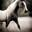

In [13]:
image, output = caption_image(f'/kaggle/input/cifake-test/1018 (8).jpg', prompt)
print(output)
image

1. Lack of fine details: The image appears to be blurry and lacks fine details, which is a common characteristic of AI generated images.
2. Unnatural coloration: The image may have unnatural coloration or a washed-out appearance, which is often a result of AI algorithms attempting to create realistic images but failing to capture the intricacies of the subject.
3. Artificial patterns: The image may contain artificial patterns or textures that are not commonly found in real-life scenes, which could be a result of the AI's attempt to generate a visually appealing image.
4. Inconsistent lighting: The lighting in the image may be inconsistent or unrealistic, with areas that are too bright or too dark, which is another common issue in AI generated images.
5. Unusual composition: The image may have an unusual composition or arrangement of elements, such as the horse's position or the background, which may not be typical of real-life scenes.
6. Lack of depth: The image may lack depth or dimen

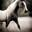

In [18]:
image, output = caption_image(f'/kaggle/input/cifake-test/1018 (8).jpg', "Your job is to help identify AI generated content. This is an AI generated image. Give me the artifacts you can find in the image which might reveal why it is an AI generated image.Enumerate all the artifacts you can find in the image which might reveal why it is AI generated as a list. Make it very descriptive. Don't give uncertain answers, give confident artifacts. The output should be a list of artifacts and descriptions for each artifact that you can find in the image.")
print(output)
image